## MongoDb With Python and Pymongo

### Imports

In [73]:
# Imports
from pymongo import MongoClient
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-dark')

### Creating Connection

In [3]:
# My Cluster from MongoDb Atlas
cluster = 'mongodb+srv://**********@cluster0.by0skfk.mongodb.net/?retryWrites=true&w=majority'

In [4]:
# Client Init
client = MongoClient('localhost', 27017)
# Databases Lists
client.list_database_names()

['Investigations', 'admin', 'config', 'local']

In [5]:
# Open Database
database = client['Investigations']
# Collections Listed on My Database
database.list_collection_names()

['DataSource']

In [6]:
# Open Collection 
collection = database['DataSource']

### Reading the Dataset with Pandas

In [7]:
# Read DataSet with Pandas
df = pd.read_excel('Dataset.xls')

### Loading Pandas Dataframe to MongoDB Collection

In [8]:
# Loading Pandas Dataframe into MongoDB Collection
records = json.loads(df.T.to_json()).values()
collection.insert_many(records)

### Loading Data From MongoDB to Python List

In [13]:
relevant_research = []
for x in collection.find({'Categoría':'Relevante'}):
    relevant_research.append(x)
full_research = []
for x in collection.find({}):
    full_research.append(x)

### Showing Relevant Research

In [10]:
df_rr = pd.DataFrame(relevant_research)
df_rr.head()

,_id,Evento Científico,Departamento,Línea de investigación,Investigación,Autor(es),Categoría,Tiempo
0,63bf3b9a995a0067ad750759,Maestría en Calidad de Software,Gestión de Software,Ingeniería de Software,Visualizador avanzado de modelos 3D para la web,"Badia Valdés, José Emilio",Relevante,2021.0
1,63bf3b9a995a0067ad75075c,Taller internacional de Inteligencia Artificia...,Inteligencia artificial y computacional,Inteligencia Artificial,Cuba frente al Big Data y la Inteligencia Arti...,"González Arencibia, Mario; Vázquez González, J...",Relevante,2016.0
2,63bf3b9a995a0067ad750761,Taller internacional de Enseñanza de las Cienc...,Humanidades,Tecnología educativa,Pruebas y herramientas para comprobar la acces...,"Domecq Babie, Dayana",Relevante,2015.0
3,63bf3b9a995a0067ad750762,Taller internacional de Ciberseguridad,Seguridad Informática,Sistemas de Gestión de la Seguridad Informática,Enfoque transcultural de la ciberseguridad.,"Batista Tellez, Raynel",Relevante,2016.0
4,63bf3b9a995a0067ad750767,Fórum de Historia,Humanidades,Desarrollo de aplicaciones móviles,Aplicaciones móviles de utilidad. Una priorida...,"Morales Robaina, Jorge A; Pazos Martínez, Jorg...",Relevante,2022.0


In [14]:
df_fr = pd.DataFrame(full_research)
df_fr.head()

,_id,Evento Científico,Departamento,Línea de investigación,Investigación,Autor(es),Categoría,Tiempo
0,63bf3b9a995a0067ad750759,Maestría en Calidad de Software,Gestión de Software,Ingeniería de Software,Visualizador avanzado de modelos 3D para la web,"Badia Valdés, José Emilio",Relevante,2021.0
1,63bf3b9a995a0067ad75075a,Maestría en Informática Avanzada,Inteligencia artificial y computacional,Computación científica,La inteligencia Artificial en la edad Preescolar,"Yanes Watson, Berta Irailis; Coca Bergolla, Yu...",Destacado,2020.0
2,63bf3b9a995a0067ad75075b,Taller internacional de Software Libre,Sistemas Digitales,Sistema Operativo,Software Libre para la educación e investigaci...,William Ricardo Rodríguez Dueñas,Mención,2014.0
3,63bf3b9a995a0067ad75075c,Taller internacional de Inteligencia Artificia...,Inteligencia artificial y computacional,Inteligencia Artificial,Cuba frente al Big Data y la Inteligencia Arti...,"González Arencibia, Mario; Vázquez González, J...",Relevante,2016.0
4,63bf3b9a995a0067ad75075d,Taller internacional de Impacto de las TIC en ...,Informática,Internet de las cosas,Tendencies in augmented reality,"Martín Amaro, Nayma; Pérez Pupo, Iliana",Mención,2021.0


### Visualisation

In [48]:
# Ploting
df_str = df_fr
del df_str['Tiempo']
del df_str['_id']
df_str.describe()

,Evento Científico,Departamento,Línea de investigación,Investigación,Autor(es),Categoría
count,58,58,58,58,58,58
unique,29,9,19,28,28,3
top,Maestría en Calidad de Software,Informática,Computación científica,Aplicaciones móviles de utilidad. Una priorida...,"Morales Robaina, Jorge A; Pazos Martínez, Jorg...",Relevante
freq,2,14,10,4,4,22


In [62]:
descr = df_str.describe().T
del descr['top']
descr.head()

,count,unique,freq
Evento Científico,58,29,2
Departamento,58,9,14
Línea de investigación,58,19,10
Investigación,58,28,4
Autor(es),58,28,4


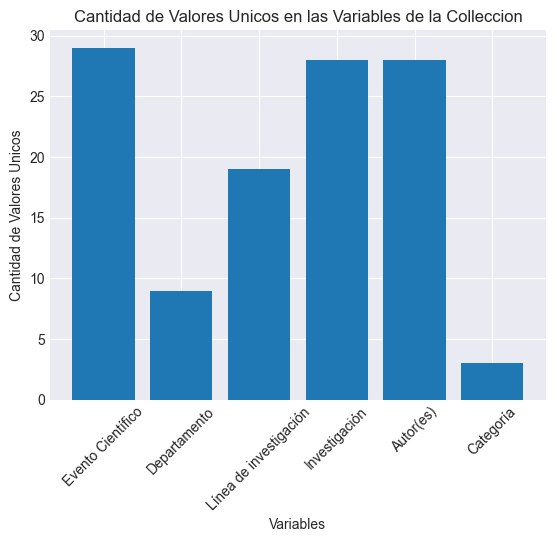

In [74]:
plt.bar(descr.index, descr['unique'])
plt.title('Cantidad de Valores Unicos en las Variables de la Colleccion')
plt.xlabel('Variables')
plt.ylabel('Cantidad de Valores Unicos')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

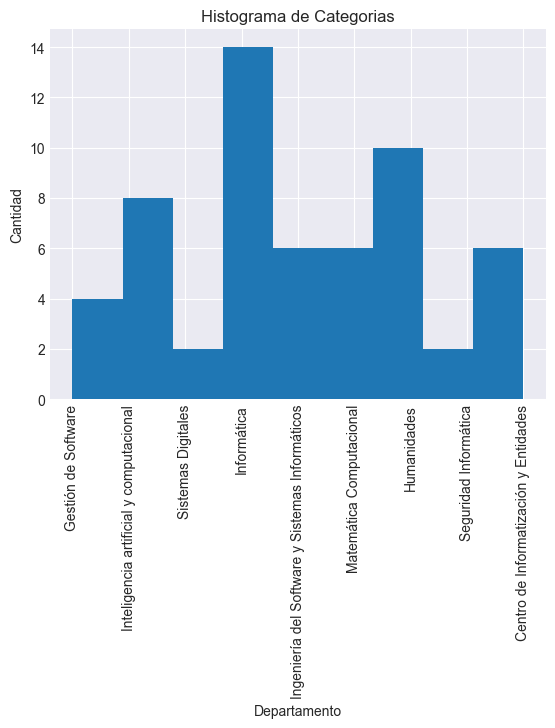

In [95]:
# Plot a histogram of emissions per capita by country
## Subplots returns a touple with the figure, axis attributes.

# Histogram Plot
plt.hist(df_str['Departamento'],9)
# Plot Config
plt.title('Histograma de Categorias')
plt.xticks(rotation = 90)
plt.xlabel('Departamento')
plt.ylabel('Cantidad')
plt.grid(True)